<a href="https://colab.research.google.com/github/sujit-kumar-singh-9115/Capstone-Classification-Project---Cardiovascular-Risk-Prediction/blob/main/Capstone(Classification)_Project_Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Capstone(Classification) Project - Cardiovascular Risk Prediction

**The dataset is from an ongoing cardiovascular study on residents of the town of Framingham,**
**Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of**
**future coronary heart disease (CHD). The dataset provides the patients’ information. It includes**
**over 4,000 records and 15 attributes.**
**Variables**
**Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk**
**factors.**

**Data Description**
**Demographic:**

**• Sex: male or female("M" or "F")**

**• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to**
**whole numbers, the concept of age is continuous)**

**Behavioral**

**• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")**

**• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be**
**considered continuous as one can have any number of cigarettes, even half a cigarette.)**

**Medical( history)**

**• BP Meds: whether or not the patient was on blood pressure medication (Nominal)**

**• Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal)**

**• Prevalent Hyp: whether or not the patient was hypertensive (Nominal)**

**• Diabetes: whether or not the patient had diabetes (Nominal)**

**Medical(current)**

**• Tot Chol: total cholesterol level (Continuous)**

**• Sys BP: systolic blood pressure (Continuous)**

**• Dia BP: diastolic blood pressure (Continuous)**

**• BMI: Body Mass Index (Continuous)**

**• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in**
**fact discrete, yet are considered continuous because of large number of possible values.)**

**• Glucose: glucose level (Continuous)**

**Predict variable (desired target)**

**• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0”** **means “No”)**

In [47]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [48]:
# saving data from csv to dataframe
df_cardiovascular = pd.read_csv('/content/drive/MyDrive/Alma-Better Folder/Module 4/Capstone(Classification) Project - Cardiovascular Risk Prediction/Copy of data_cardiovascular_risk.csv')

In [49]:
# checking the data columns and values for first 10 rows
df_cardiovascular.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [6]:
#shape of the data
df_cardiovascular.shape

(3390, 17)

In [7]:
#information of the data
df_cardiovascular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [8]:
df_cardiovascular.describe()

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,3390.000000,3390.000000,3303.000000,3368.000000,3346.000000,3390.000000,3390.000000,3390.000000,3352.000000,3390.00000,3390.000000,3376.000000,3389.000000,3086.000000,3390.000000
mean,1694.500000,49.542183,1.970936,9.069477,0.029886,0.006490,0.315339,0.025664,237.074284,132.60118,82.883038,25.794964,75.977279,82.086520,0.150737
std,978.753033,8.592878,1.019081,11.879078,0.170299,0.080309,0.464719,0.158153,45.247430,22.29203,12.023581,4.115449,11.971868,24.244753,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.50000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,847.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.00000,74.500000,23.020000,68.000000,71.000000,0.000000
50%,1694.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.50000,82.000000,25.380000,75.000000,78.000000,0.000000
75%,2541.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,264.000000,144.00000,90.000000,28.040000,83.000000,87.000000,0.000000
max,3389.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.00000,142.500000,56.800000,143.000000,394.000000,1.000000


In [9]:
df_cardiovascular.columns

Index(['id', 'age', 'education', 'sex', 'is_smoking', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

#Checking the null values(missing values)#

In [10]:
#information of the missing values
df_cardiovascular.isna().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

# Data Preprocessing & Feature engineering

In [11]:
# looking column names, datatype of features, null values, unique values and their number of unique values
cardiovascular_detais = [[col,df_cardiovascular[col].dtype,df_cardiovascular[col].isna().sum(),
                            round(df_cardiovascular[col].isnull().sum()/len(df_cardiovascular)*100,2),df_cardiovascular[col].nunique(),
                            df_cardiovascular[col].unique()] for col in df_cardiovascular.columns]
df_cardiovascular_details = pd.DataFrame(cardiovascular_detais, columns = ['Column', 'Dtype', 'Null', 'Null (%)', 'nUnique', 'Unique'])  
df_cardiovascular_details                         

,Column,Dtype,Null,Null (%),nUnique,Unique
0,id,int64,0,0.00,3390,"[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
1,age,int64,0,0.00,39,"[64, 36, 46, 50, 61, 41, 55, 53, 43, 44, 58, 5..."
2,education,float64,87,2.57,4,"[2.0, 4.0, 1.0, 3.0, nan]"
3,sex,object,0,0.00,2,"[F, M]"
4,is_smoking,object,0,0.00,2,"[YES, NO]"
5,cigsPerDay,float64,22,0.65,32,"[3.0, 0.0, 10.0, 20.0, 30.0, 35.0, 40.0, 15.0,..."
6,BPMeds,float64,44,1.30,2,"[0.0, nan, 1.0]"
7,prevalentStroke,int64,0,0.00,2,"[0, 1]"
8,prevalentHyp,int64,0,0.00,2,"[0, 1]"
9,diabetes,int64,0,0.00,2,"[0, 1]"


In [12]:
#Sanity check
round(df_cardiovascular.isnull().sum()/len(df_cardiovascular)*100,2).sort_values(ascending=False).head(10)

glucose       8.97
education     2.57
BPMeds        1.30
totChol       1.12
cigsPerDay    0.65
BMI           0.41
heartRate     0.03
id            0.00
diaBP         0.00
sysBP         0.00
dtype: float64

We havee missing values in:
 

*   glucose    -       8.97 %
*   education   -      2.57 %
*   BPMeds      -      1.30 %
*   totChol    -       1.12 %
*   cigsPerDay  -      0.65 %
*   BMI         -      0.41 %
*   heartRate  -       0.03 %

* Except glucose all other features in the dataset have less than 5% null values.

* Now the main issue with these null values is that they can't be estimated from other data entries. The dataset we are working on is from a medical domain, that said, the entries in this data are person specific and the values vary among different individuals. Its a rare chance the two individuals share same health stats, hence the most logical option that we have to deal with such values is removing the rows with any null value.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<function matplotlib.pyplot.show(*args, **kw)>

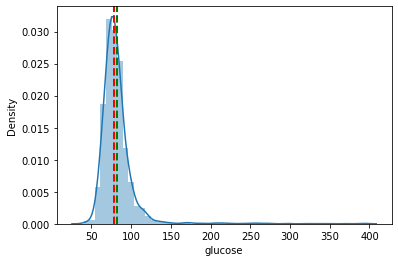

In [13]:
plt.figure(figsize=(6,4))
ax = sns.distplot(df_cardiovascular['glucose'])
ax.axvline(df_cardiovascular['glucose'].median(), color='red', linestyle='dashed', linewidth=2)
ax.axvline(df_cardiovascular['glucose'].mean(), color='green', linestyle='dashed', linewidth=2)
plt.show

* Since the Glucose distribution plot is normaly distributed we will fill the nan by mean

In [50]:
# filling glucose with the mean value
df_cardiovascular['glucose'].fillna(df_cardiovascular['glucose'].mean(), inplace = True)

In [51]:
# dropping the missing value.
df_cardiovascular.dropna(how = "any", inplace = True)

In [52]:
# Checking if there's still any null values left.
df_cardiovascular.isna().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

* There are no null values present in our dataset

#**Checking duplicate values**

In [53]:
# Checking for the duplicate values
df_cardiovascular.duplicated().sum()

0

* There are no duplicate values in our dataset

#**Dropping irrelevant features**

In [54]:
#Dropping redundant variable "id"
df_cardiovascular.drop("id",axis=1,inplace=True) 

*   Since ID has no effect on target variable so we will drop this column from our dataset.

#**Dealing with outliers**

In [55]:
# Numerical variables
numerical = [var for var in df_cardiovascular.columns if df_cardiovascular[var].dtype !='O'and var not in ['BPMeds','diabetes','prevalentStroke','prevalentHyp','TenYearCHD'] ]
print('There are {} numerical variables'.format(len(numerical)))
print(numerical)

There are 9 numerical variables
['age', 'education', 'cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']


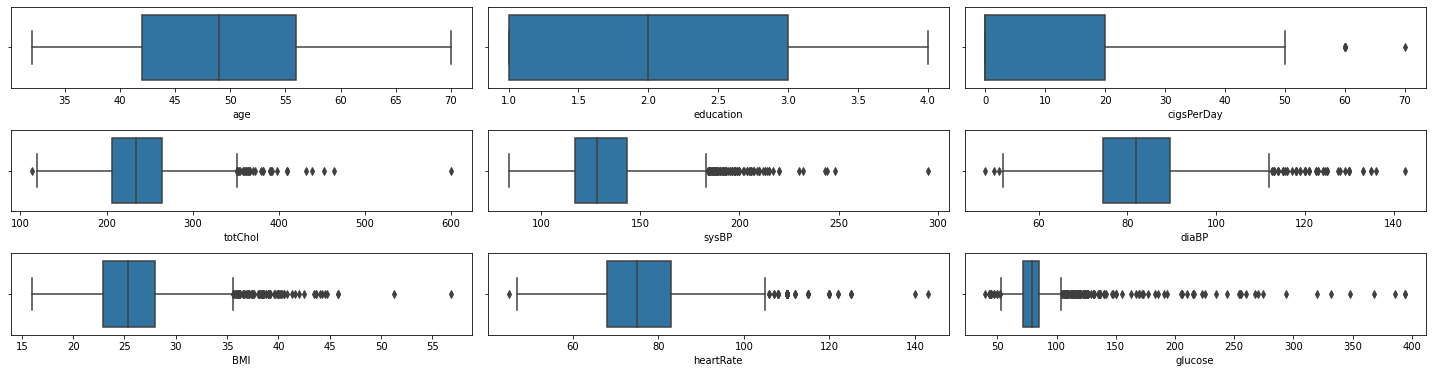

In [56]:
# looking for outliers of every fearture of dataset with the help of boxplot
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)
plt.figure(figsize = (20, 10))
num = 1 

for col in numerical:
    plt.subplot(6,3,num)
    sns.boxplot(df_cardiovascular[col])
    num+=1
    
plt.tight_layout()

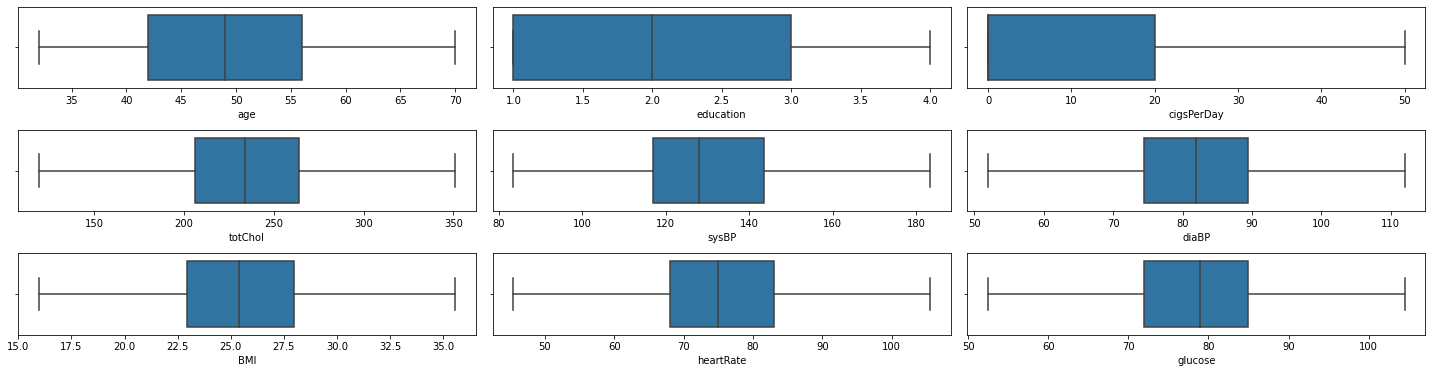

In [57]:
##Dealing with the outliers by Capping the outlier rows with Percentiles
plt.figure(figsize = (20, 10))
num = 1 

for col in numerical:
    plt.subplot(6,3,num)
    iqr = (np.quantile(df_cardiovascular[col], 0.75))-(np.quantile(df_cardiovascular[col], 0.25))
    upper_bound = np.quantile(df_cardiovascular[col], 0.75)+(1.5*iqr)
    lower_bound = np.quantile(df_cardiovascular[col], 0.25)-(1.5*iqr)
    df_cardiovascular[col] = np.where(df_cardiovascular[col] > upper_bound,
                               upper_bound,df_cardiovascular[col]) #higher
    df_cardiovascular[col] = np.where(df_cardiovascular[col] < lower_bound, 
                               lower_bound,df_cardiovascular[col])
    sns.boxplot(df_cardiovascular[col])
    num+=1
    
plt.tight_layout()

* Now, there are no outliers present in our dataset.

# **Categorical encoding**

In [58]:
# Categorical encoding for smoking column (0='NO' and 1 ='YES')
df_cardiovascular['is_smoking'].replace({'YES':1,'NO':0},inplace=True)

# Categorical encoding for smoking column (1='M' and 2 ='F')
df_cardiovascular['sex'].replace({'M':0,'F':1},inplace=True)

# **Renaming Target Variable**

In [59]:
#Renaming Target Variable TenYearCHD  to Heart_DiseaseProbability
df_cardiovascular = df_cardiovascular.rename(columns={'TenYearCHD':'Heart_DiseaseProbability'})

In [60]:
df_cardiovascular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 1 to 3389
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       3189 non-null   float64
 1   education                 3189 non-null   float64
 2   sex                       3189 non-null   int64  
 3   is_smoking                3189 non-null   int64  
 4   cigsPerDay                3189 non-null   float64
 5   BPMeds                    3189 non-null   float64
 6   prevalentStroke           3189 non-null   int64  
 7   prevalentHyp              3189 non-null   int64  
 8   diabetes                  3189 non-null   int64  
 9   totChol                   3189 non-null   float64
 10  sysBP                     3189 non-null   float64
 11  diaBP                     3189 non-null   float64
 12  BMI                       3189 non-null   float64
 13  heartRate                 3189 non-null   float64
 14  glucose 

# **Exploratory Data Analysis (EDA)** 

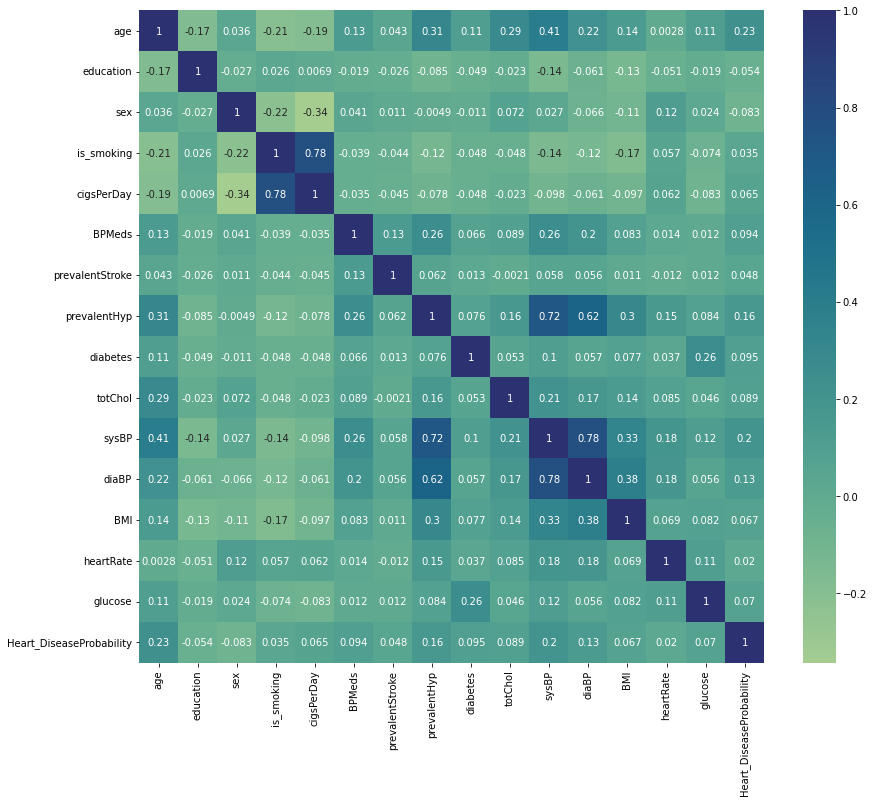

In [25]:
# ploting heat map finding correlation between columns
cdf = df_cardiovascular.corr()
plt.figure(figsize=(14,12))
sns.heatmap(cdf,annot = True,cmap="crest")

In [61]:
# Combining systolic and diastolic blood pressure column through formula 
df_cardiovascular['map']=round((df_cardiovascular['sysBP']+2*df_cardiovascular['diaBP'])/3,3) # calculating mean arterial pressure and storing in seperate column

# droping systolic and diastolic blood pressure column
df_cardiovascular.drop(['sysBP','diaBP'],axis=1,inplace=True)

In [62]:
# droping  is_smoking since it has a high collinearity with cidsPerDay column
df_cardiovascular.drop(['is_smoking'],axis=1,inplace=True)

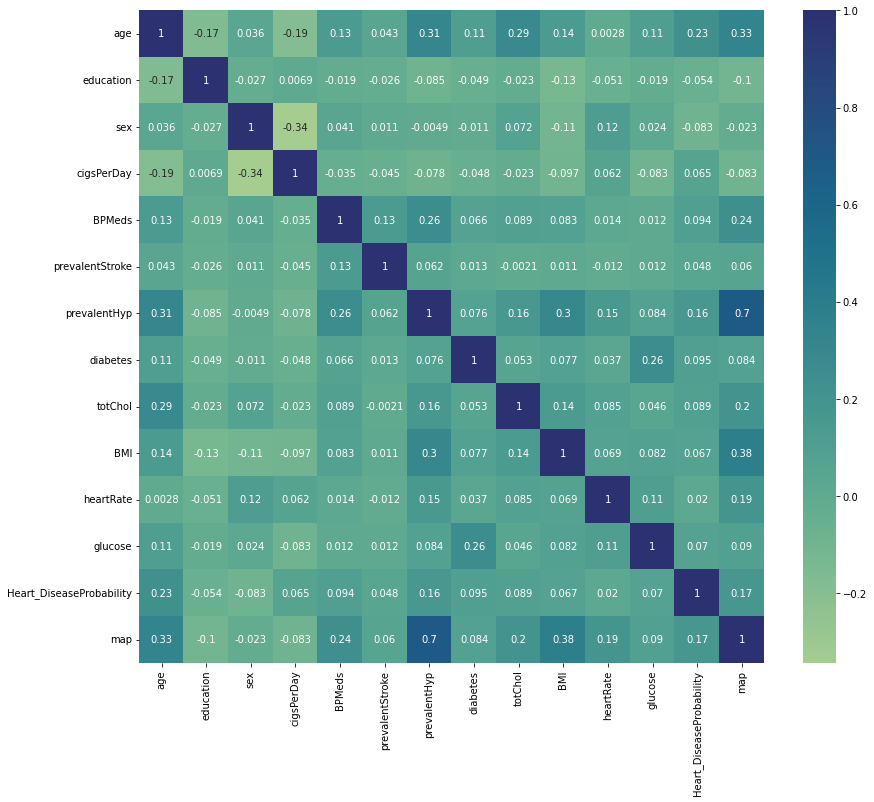

In [28]:
# ploting heat map finding correlation between columns
cdf = df_cardiovascular.corr()
plt.figure(figsize=(14,12))
sns.heatmap(cdf,annot = True,cmap="crest")

# **Univariate analysis**

In [29]:
df_cardiovascular['Heart_DiseaseProbability'].value_counts()

0    2714
1     475
Name: Heart_DiseaseProbability, dtype: int64

* 10-year risk of coronary heart disease Probability: “1”, means “Yes”, “0” means “No”)

##1. Heart disease (target variable) distribution

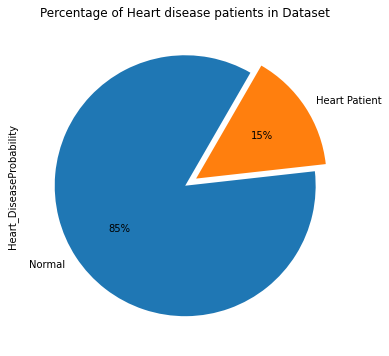

In [30]:
# Plotting the percentage pie plot
fig, ax1 = plt.subplots(nrows=1, ncols=1, sharey=False, figsize=(14,6))
ax1 = df_cardiovascular['Heart_DiseaseProbability'].value_counts().plot.pie( x="Heart_DiseaseProbability" ,y ='no.of patients', 
autopct = "%1.0f%%",labels=["Normal","Heart Patient"], startangle = 60,ax=ax1,explode = (0,0.1))
ax1.set(title = 'Percentage of Heart disease patients in Dataset')
plt.show()

* According to pie chart, dataset contains 85% normal persons' and 15% heart patients' data.
* The class of the dataset is highly imbalanced, we will use SMOTE technique to handle class imbalance.

What is imbalanced data?

Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

Methods to handle imbalanced dataset

* Resampling
* SMOTE (Synthetic Minority Oversampling Technique)
* BalancedBaggingClassifier

We shall use SMOTE Technique here to balance our imbalanced dataset

* Highly imbalanced data will be dealt further at the time of model building.

##**2. Genderwise distribution**

In [31]:
# creating separate df for normal and heart patients

patient =df_cardiovascular[df_cardiovascular['Heart_DiseaseProbability']==1]

normal =df_cardiovascular[df_cardiovascular['Heart_DiseaseProbability']==0]

Text(0.5, 1.0, 'GENDER DISTRIBUTION ')

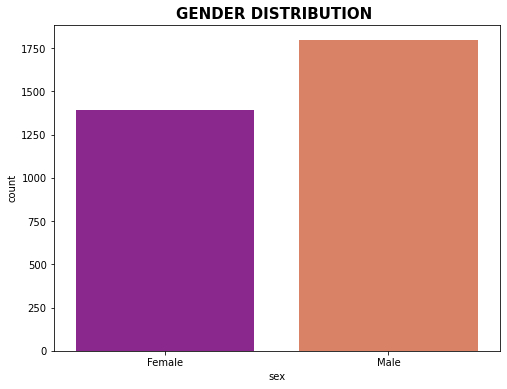

In [32]:
plt.figure(figsize=(8,6))
ax = sns.countplot(df_cardiovascular['sex'], palette='plasma')
ax.set(xticklabels = (['Female','Male']))
plt.title('GENDER DISTRIBUTION ', fontsize=15, weight='bold' )

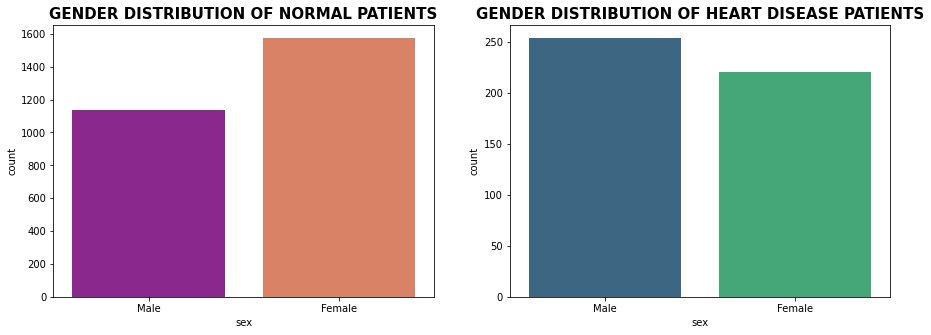

In [33]:
# plotting normal patients
fig,ax=plt.subplots(figsize=(15,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.countplot(normal['sex'], palette='plasma')
ax1.set(xticklabels = (['Male','Female']))
plt.title('GENDER DISTRIBUTION OF NORMAL PATIENTS', fontsize=15, weight='bold' )


#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.countplot(patient['sex'], palette='viridis')
ax1.set(xticklabels = (['Male','Female']))
plt.title('GENDER DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

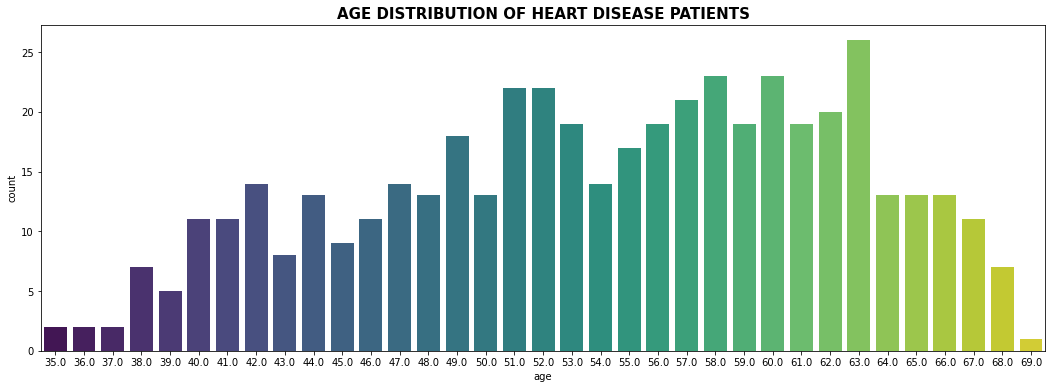

In [34]:

#plotting heart patients
plt.figure(figsize=(18,6))
sns.countplot(patient['age'], palette='viridis')
plt.title('AGE DISTRIBUTION OF HEART DISEASE PATIENTS', fontsize=15, weight='bold' )
plt.show()

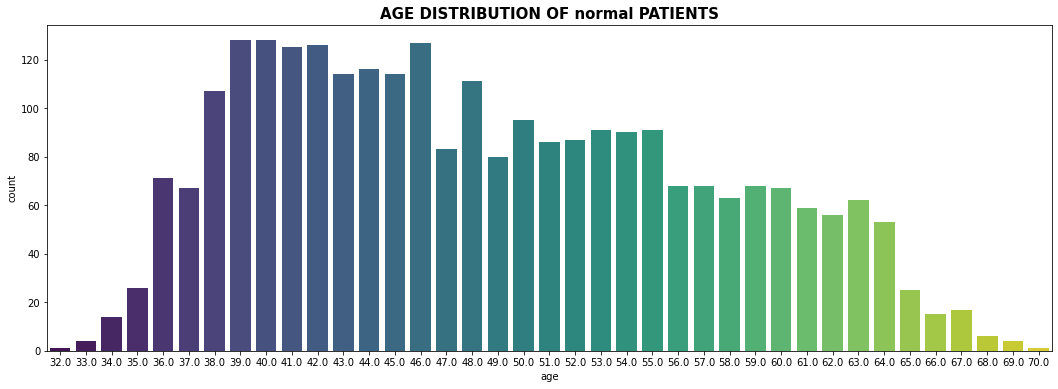

In [35]:
#plotting heart patients
plt.figure(figsize=(18,6))
sns.countplot(normal['age'], palette='viridis')
plt.title('AGE DISTRIBUTION OF normal PATIENTS', fontsize=15, weight='bold' )
plt.show()

* According to the chart, as age increases, the chances of suffering from heart problems are more likely.

## 4 Education Distribution

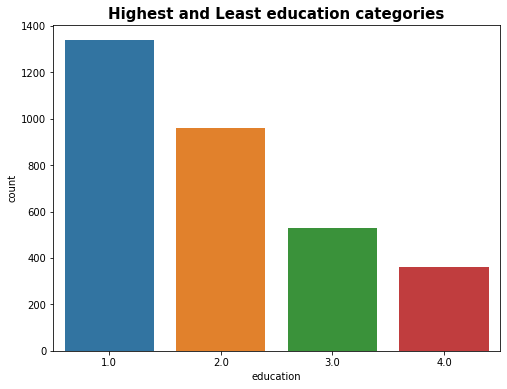

In [36]:
plt.figure(figsize=(8,6))
ax = sns.countplot(df_cardiovascular['education'])
plt.title('Highest and Least education categories', fontsize=15, weight='bold' )
plt.show()

* According to plot, highest and least education categories are 1 and 4 respectively.

##Body Mass Index (BMI) Distribution

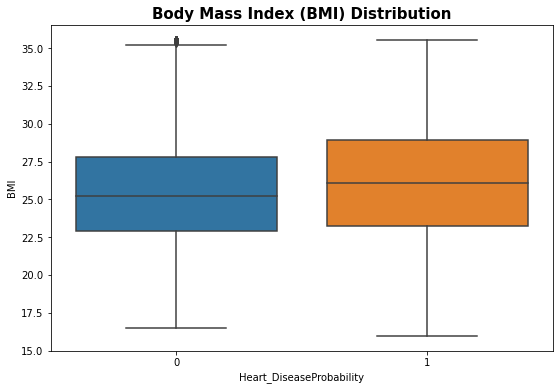

In [41]:
#plotting Body Mass Index (BMI) Distribution
plt.figure(figsize=(9,6))
sns.boxplot(x = 'Heart_DiseaseProbability' ,y = 'BMI', data =df_cardiovascular )
plt.title('Body Mass Index (BMI) Distribution', fontsize=15, weight='bold' )
plt.show()

* According to boxplot, Higher BMI leads to higher chances of Heart Disease

##**6.Cholestrol Distribution**

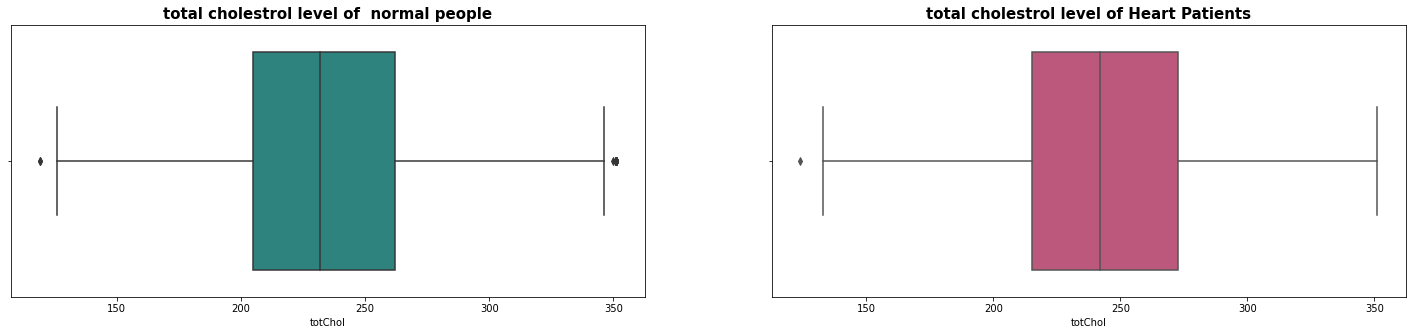

In [64]:
# plotting normal patients
fig = plt.figure(figsize=(25,5))
ax1 = plt.subplot2grid((1,2),(0,0))
sns.boxplot(x='totChol',data = normal, palette='viridis')
plt.title('total cholestrol level of  normal people', fontsize=15, weight='bold')

#plotting heart patients
ax1 = plt.subplot2grid((1,2),(0,1))
sns.boxplot(x='totChol',data = patient, palette='plasma')
plt.title('total cholestrol level of Heart Patients', fontsize=15, weight='bold' )
plt.show()

* Total Cholestrol level of heart patient seems to be slightly higher than normal patient.
* People who have cholesterol level more than 240 are prone to heart problems.

### Mean Arterial Pressure (map) Distribution

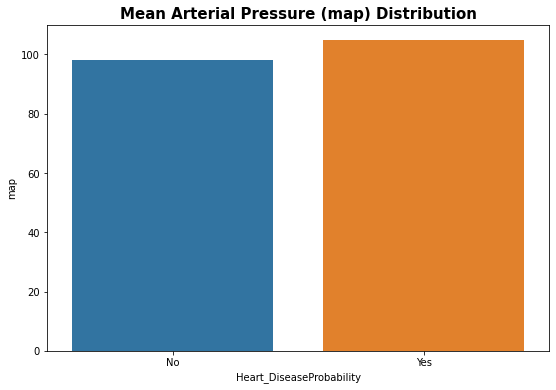

In [68]:
#plotting Body Mass Index (BMI) Distribution
plt.figure(figsize=(9,6))
ax = sns.barplot(x = 'Heart_DiseaseProbability' ,y = 'map', data =df_cardiovascular,ci = False )
ax.set(xticklabels = (['No','Yes']))
plt.title('Mean Arterial Pressure (map) Distribution', fontsize=15, weight='bold' )
plt.show()

* In the above graph, the heart disease patients have higher MAP.
* If the value of MAP is above 96, the patient is more prone to Heart Disease or suffer Hypertension.

##**8.Mean and Median Visualization**

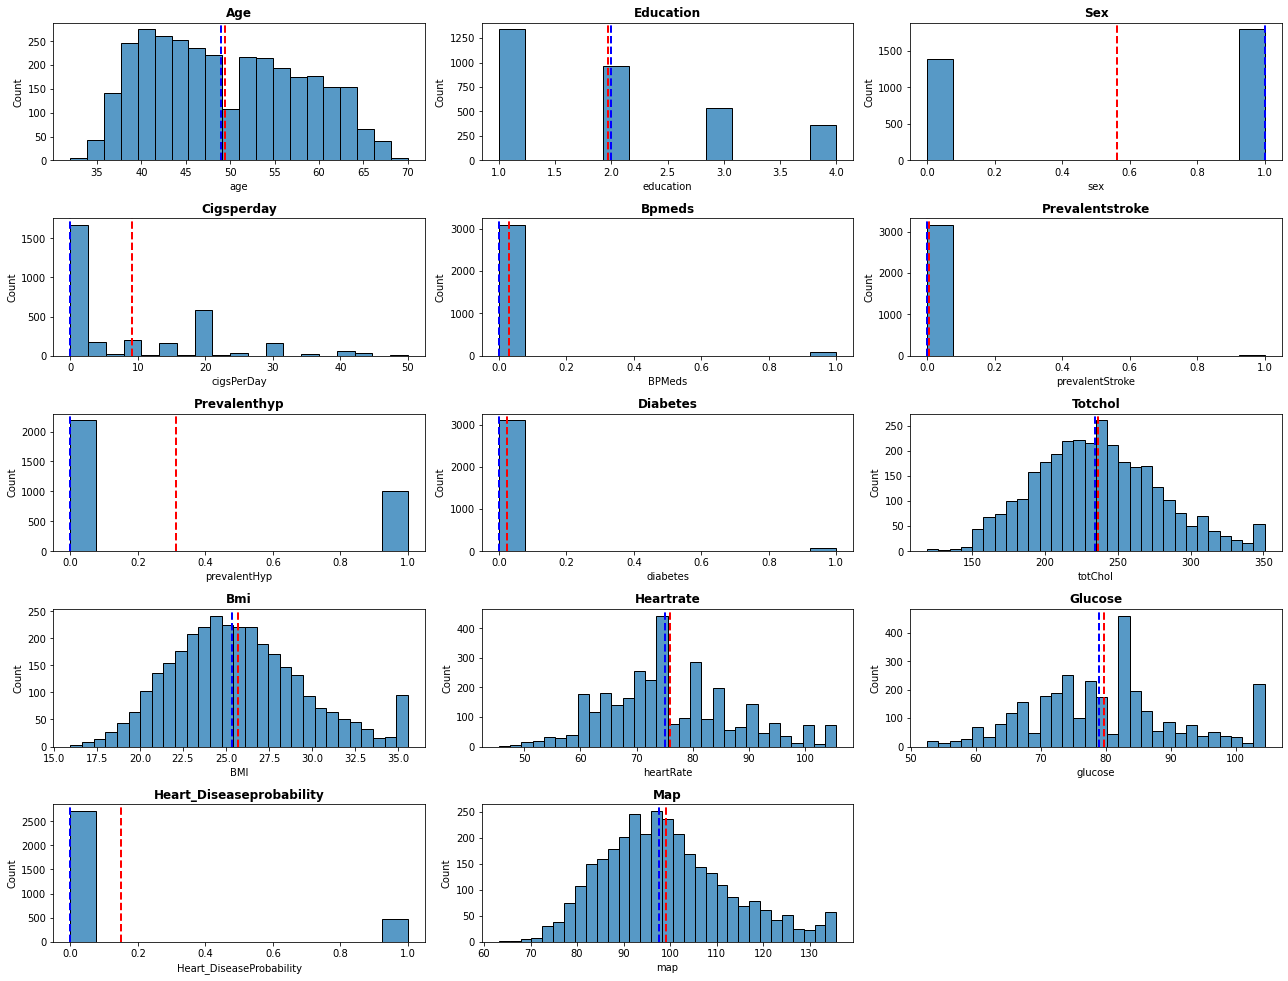

In [70]:
# Visualizing the mean and median lines for various attributes, 
# along with their distribution graphs.
plt.figure(figsize=(18,16))

# Making subplots for all the features to represent their mean, median and distributions
for i, column in enumerate(df_cardiovascular.columns):
  feature = df_cardiovascular[column]
  ax=plt.subplot(6, 3, i+1)
  sns.histplot(feature)
  ax.axvline(feature.mean(), color='red', linestyle='dashed', linewidth=2)
  ax.axvline(feature.median(), color='blue', linestyle='dashed', linewidth=2)
  plt.title(f'{column.title()}',weight='bold')
  plt.tight_layout()

In [71]:
df_cardiovascular.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3189 entries, 1 to 3389
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       3189 non-null   float64
 1   education                 3189 non-null   float64
 2   sex                       3189 non-null   int64  
 3   cigsPerDay                3189 non-null   float64
 4   BPMeds                    3189 non-null   float64
 5   prevalentStroke           3189 non-null   int64  
 6   prevalentHyp              3189 non-null   int64  
 7   diabetes                  3189 non-null   int64  
 8   totChol                   3189 non-null   float64
 9   BMI                       3189 non-null   float64
 10  heartRate                 3189 non-null   float64
 11  glucose                   3189 non-null   float64
 12  Heart_DiseaseProbability  3189 non-null   int64  
 13  map                       3189 non-null   float64
dtypes: float